# Runs the script to compare edit/C metrics between replicates

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
from scipy import stats
from tqdm import tnrange, tqdm_notebook
from collections import defaultdict
from matplotlib_venn import venn2, venn3

In [3]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/'

In [4]:
all_annotated = sorted(glob.glob(os.path.join(input_dir, 'Sample*.windows.txt')))
print(len(all_annotated))
all_annotated[:3]

31


['/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/Sample11_S29_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows.txt',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/Sample12_S30_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows.txt',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/Sample13_S31_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.windows.txt']

# Compare reps

In [5]:
def convert_line_to_id(row):
    return "{}_{}_{}".format(row['line'], row['dox ng'], row['hours'])

manifest = pd.read_excel('/home/bay001/projects/kris_apobec_20200121/permanent_data/lenti_bulk_replicate_timecourse_IDs.xlsx')
manifest['SampleID'] = manifest.apply(convert_line_to_id, axis=1)

In [6]:
ids = defaultdict(list)

for row in manifest.iterrows():
    ids[row[1]['SampleID']].append("Sample{}_".format(row[1]['sample']))

In [7]:
samples = defaultdict(list)
for key, prefixes in ids.items():
    for prefix in prefixes:
        try:
            samples[key].append(sorted(glob.glob(os.path.join(input_dir, '{}*.windows.txt'.format(prefix))))[0])
        except IndexError:
            print("{} not found.".format(prefix))

Sample3_ not found.
Sample6_ not found.
Sample9_ not found.
Sample10_ not found.
Sample33_ not found.
Sample34_ not found.
Sample35_ not found.
Sample36_ not found.
Sample37_ not found.
Sample38_ not found.
Sample39_ not found.
Sample40_ not found.


In [8]:
def combine_window_reps(rep1_file, rep2_file):
    rep1 = pd.read_csv(rep1_file, sep='\t')
    rep1['region'] = rep1['name'].apply(lambda x: x.split('|')[1])
    rep2 = pd.read_csv(rep2_file, sep='\t')
    rep2['region'] = rep2['name'].apply(lambda x: x.split('|')[1])

    rep1 = rep1[(rep1['region']=='CDS') | (rep1['region']=='3utr')]
    rep2 = rep2[(rep2['region']=='CDS') | (rep2['region']=='3utr')]

    merged = pd.merge(
        rep1, 
        rep2, 
        how='inner', 
        left_on=['chrom','start','end','name','strand','region'], 
        right_on=['chrom','start','end','name','strand','region']
    )
    merged['score'] = (merged['score_x'] + merged['score_y'])/2
    merged['edit_coverage'] = (merged['edit_coverage_x'] + merged['edit_coverage_y'])
    merged['editable_coverage'] = (merged['editable_coverage_x'] + merged['editable_coverage_y'])
    merged['all_c_coverage'] = (merged['all_c_coverage_x'] + merged['all_c_coverage_y'])

    merged['edited_over_all_c'] = (merged['edit_coverage']/merged['all_c_coverage'])
    merged['edited_over_edited_c'] = (merged['edit_coverage']/merged['editable_coverage'])
    
    # merged = merged[['{}_x'.format(score), '{}_y'.format(score)]]
    print(rep1.shape[0], rep2.shape[0], merged.shape[0])
    j = sns.jointplot(
        x='{}_x'.format(score), 
        y='{}_y'.format(score), 
        data=merged, 
        kind='reg', 
        stat_func=r2,
        xlim=(0, max(rep1[score].max(), rep2[score].max())),
        ylim=(0, max(rep1[score].max(), rep2[score].max()))
    )
    merged = merged[rep1.columns]
    del merged['region']
    j.fig.subplots_adjust(top=0.9)
    j.fig.suptitle(key, fontsize=16)
    j.savefig(os.path.join(output_dir, '{}{}.intersected_windows.svg'.format(key, score)))
    return merged

9683 7684 44


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


8810 9268 53


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


5898 5652 36


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


5292 17742 49


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


13766 4066 27


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


28947 21568 2205


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


60483 46636 10725


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


16289 12324 1515


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


45884 28409 7240


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


25511 21309 2038


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


32503 59441 8489


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


10110 6004 54


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


10717 17796 391


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


13974 31333 2184


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


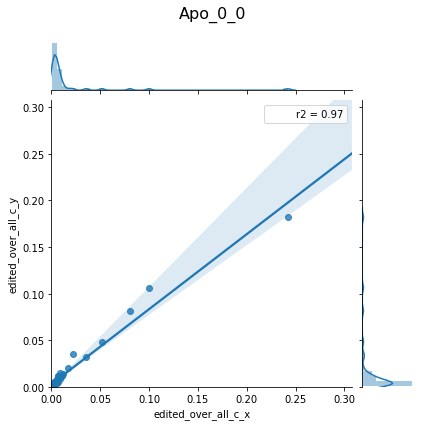

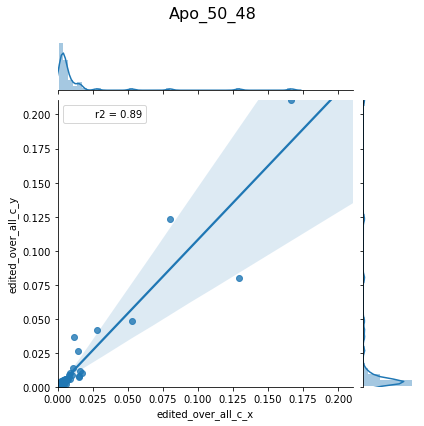

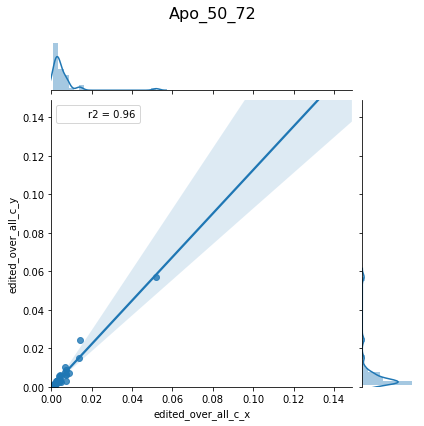

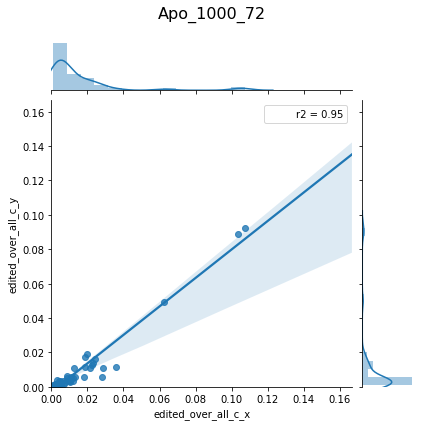

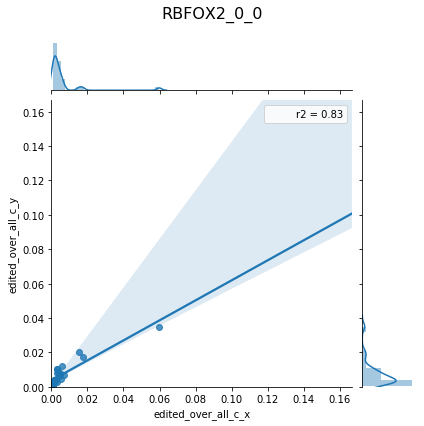

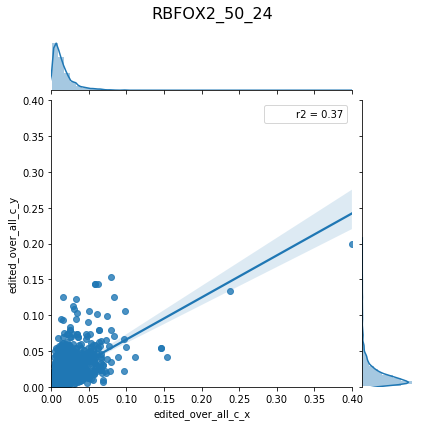

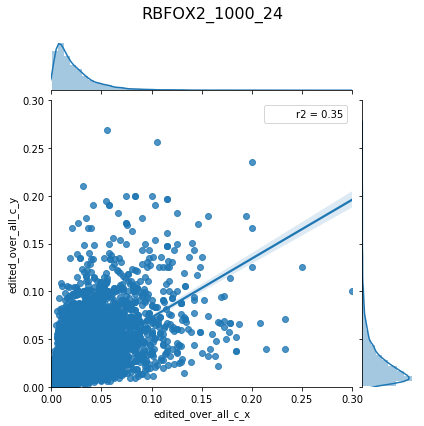

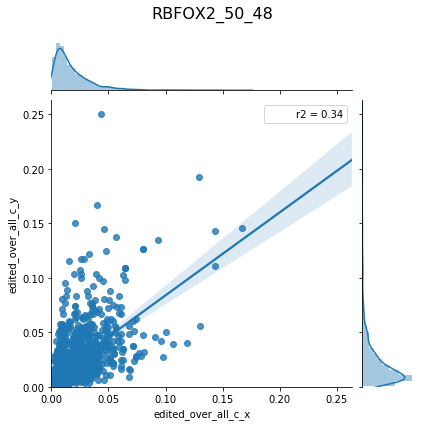

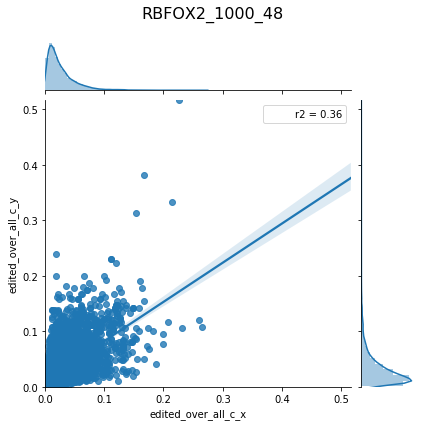

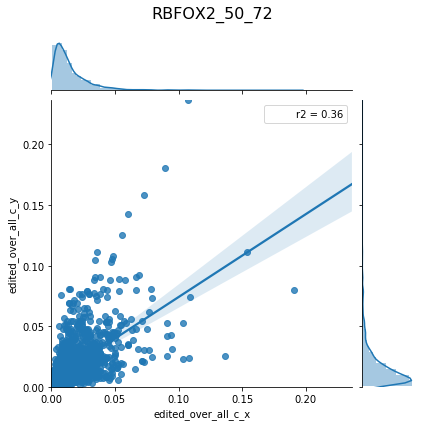

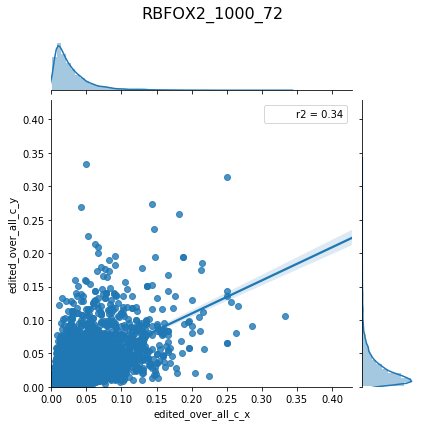

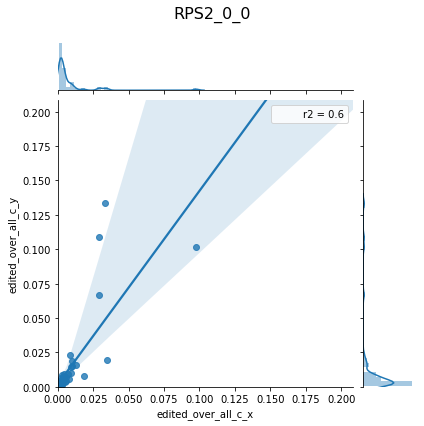

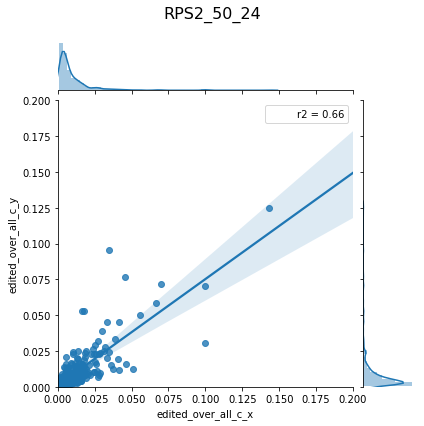

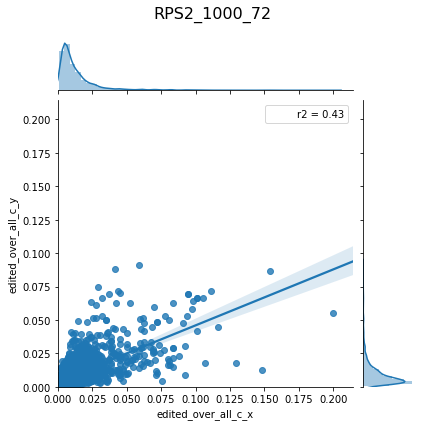

In [9]:
score = 'edited_over_all_c'

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

progress = tnrange(len(samples.keys()))
for key in samples.keys():
    if len(samples[key]) == 2:
        df = combine_window_reps(samples[key][0], samples[key][1])
        df.to_csv(os.path.join(output_dir, '{}.intersected_windows.txt'.format(key)), sep='\t', index=False, header=True)